In [11]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import math
import copy

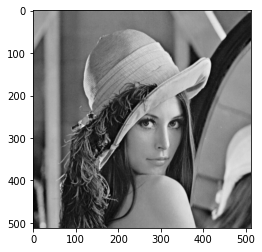

In [12]:
gray_image=cv.imread('lenna.png',0)
plt.imshow(gray_image,cmap='gray')

formula:
H(u,v)=expoential(-[Distance from D(u,v) to center (D)]**2-D0**2/(D*W)), where D0 is the 截止半徑 = sigma, W is bandwidth

In [38]:
def custom_gaussian_bandpass(fft,d0,bandwidth):
    temp=copy.copy(fft)
    center=(round(temp.shape[0]/2),round(temp.shape[1]/2))
    for u, rows in enumerate(temp):
        for v, cols in enumerate(rows):
            dist=math.sqrt((u-center[0])**2 + (v-center[1])**2)
            h=1-math.exp(-math.pow((math.pow(dist,2)-math.pow(d0,2))/(1+dist*bandwidth),2))
            temp[u,v]=temp[u,v]*h
    return temp

C:\Users\david\AppData\Local\Temp\ipykernel_42508\2270727407.py:6: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(fft_2)),cmap='gray')


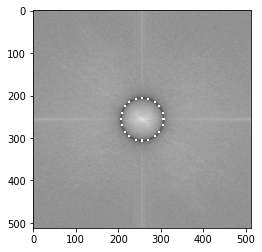

In [39]:
fft=np.fft.fftshift(np.fft.fft2(gray_image))
# Gaussian filter
fft_1=custom_gaussian_bandpass(fft,25,100)
fft_2=custom_gaussian_bandpass(fft,50,100)
fft_3=custom_gaussian_bandpass(fft,100,100)
plt.imshow(np.log(abs(fft_2)),cmap='gray')

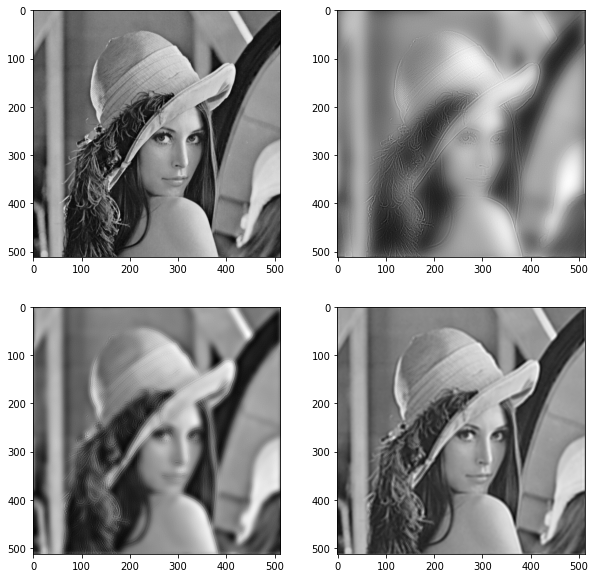

In [40]:
ifft_1=np.fft.ifft2(fft_1)
ifft_2=np.fft.ifft2(fft_2)
ifft_3=np.fft.ifft2(fft_3)

fig,ax=plt.subplots(2,2,figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(gray_image,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(abs(ifft_1),cmap='gray')
plt.subplot(2,2,3)
plt.imshow(abs(ifft_2),cmap='gray')
plt.subplot(2,2,4)
plt.imshow(abs(ifft_3),cmap='gray')